In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pd.set_option("display.max_columns", None)
#df = pd.read_csv("House_Rent_Dataset.csv")
df = pd.read_csv("/content/drive/MyDrive/#2-M.Sc Computer Science [SXC]/1st Year/Books and notes/Sem 4/Machine Learning/SM+SS/13-02-23/House_Rent_Dataset.csv")
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


- #### Multiple Regression

In [5]:
df_n = df[['Size', 'Furnishing Status', 'Rent']]
df_n.head()

,Size,Furnishing Status,Rent
0,1100,Unfurnished,10000
1,800,Semi-Furnished,20000
2,1000,Semi-Furnished,17000
3,800,Unfurnished,10000
4,850,Unfurnished,7500


In [6]:
df_n = pd.get_dummies(df_n)

In [7]:
df_n.head()

,Size,Rent,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,1100,10000,0,0,1
1,800,20000,0,1,0
2,1000,17000,0,1,0
3,800,10000,0,0,1
4,850,7500,0,0,1


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
X = df_n[['Size', 'Furnishing Status_Furnished', 'Furnishing Status_Semi-Furnished', 'Furnishing Status_Unfurnished']]
Y = df_n[['Rent']]

In [10]:
regr = LinearRegression()
regr.fit(X, Y)

LinearRegression()

In [11]:
regr.predict([[1100, 0, 1, 0]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[39851.8004591]])

- #### Polynomial Regression

In [16]:
myModel = np.poly1d(np.polyfit(df_n['Size'], df['Rent'], 3))
myLine = np.linspace(df_n['Size'].min(), df_n['Size'].max(), len(df_n['Size']))

In [17]:
import matplotlib.pyplot as plt

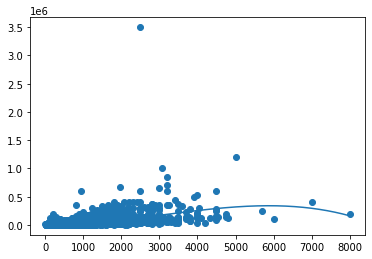

In [18]:
plt.scatter(df_n['Size'], df['Rent'])
plt.plot(myLine, myModel(myLine))
plt.show()

- #### Linear Regression

In [19]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(df_n['Size'], df['Rent'])

In [20]:
def myFunc(x):
    return slope*x + intercept

In [21]:
myModel = list(map(myFunc, df_n['Size']))

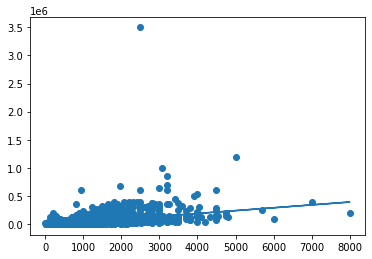

In [22]:
plt.scatter(df_n['Size'], df['Rent'])
plt.plot(df_n['Size'], myModel)
plt.show()